In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read csv file and store in dataframe
df = pd.read_csv('churn_clean.csv')

In [3]:
# Get for 3 row to see all columns 
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [4]:
# Rename the survey columns items 1-8
df.rename(columns={
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening',
}, inplace=True)

In [5]:
# Make sure changes happened for survey rename
df.head(1)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611,5,5,5,3,4,4,3,4


In [6]:
# Describe the data statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
# Easily see the column names by getting a list of columns
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

In [8]:
# Check if right number of columns and records still exist
df.shape

(10000, 50)

In [9]:
# Check if values contain nulls and if so get the sum of all
df.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone         

In [10]:
# Remove some columns that I feel I do not need from original dataset 
df = df.drop(columns=[
  'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 
  'County','Zip','Lat','Lng','Population','Area','TimeZone', 'Job', 
  'Marital'
])

In [11]:
# Check if changes have happen
df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response',
       'Timely fixes', 'Timely replacements', 'Reliability', 'Options',
       'Respectful response', 'Courteous exchange',
       'Evidence of active listening'],
      dtype='object')

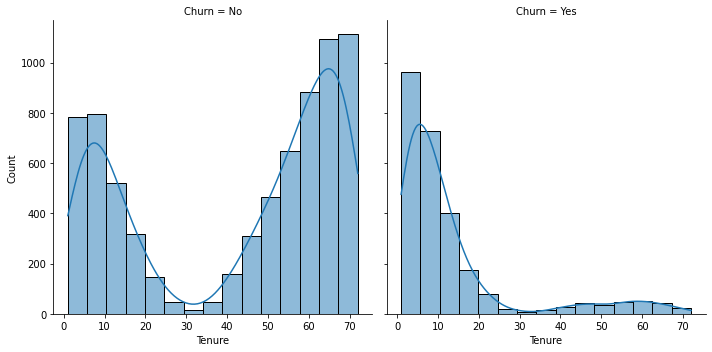

In [12]:
# Use a histogram
sns.displot(x='Tenure', col='Churn',kde=True, data=df)

<function matplotlib.pyplot.tight_layout>

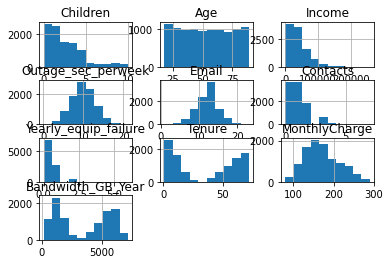

In [13]:
#Univariate 
#Create visiual for continous variables
df[['Children', 'Age', 'Income', 'Outage_sec_perweek',
    'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year',]].hist()
plt.savefig('ChurnPlot.jpg')     
plt.tight_layout


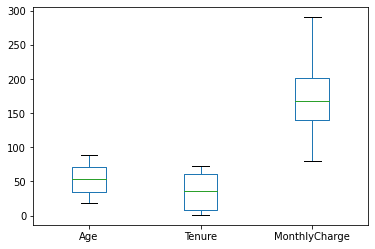

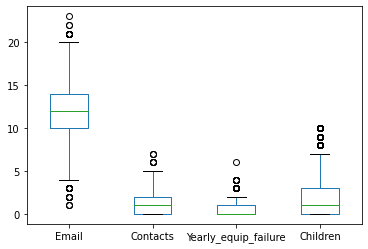

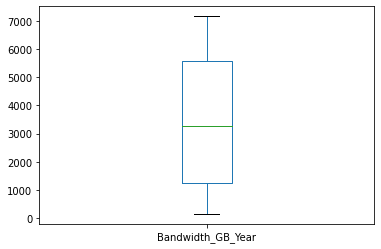

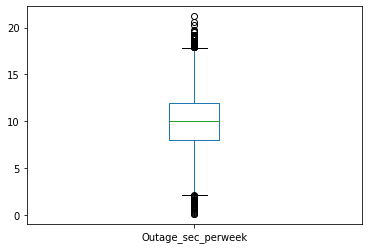

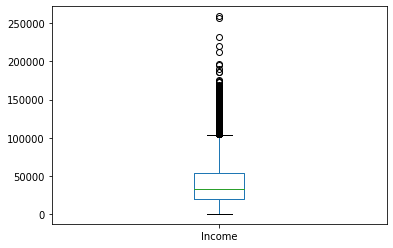

In [14]:
#BoxPlots for continuous varaiables
df[['Age','Tenure','MonthlyCharge', ]].plot.box()
df[['Email', 'Contacts', 'Yearly_equip_failure', 'Children']].plot.box()
df[['Bandwidth_GB_Year']].plot.box()
df[['Outage_sec_perweek']].plot.box()
df[['Income']].plot.box()

Text(0.5, 20.80000000000002, 'Independent Variable')

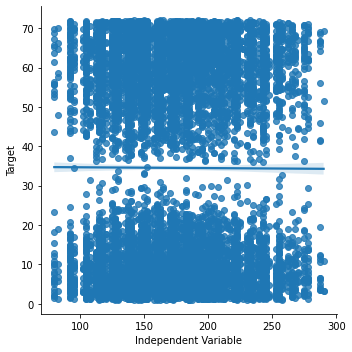

In [15]:
# Check for Linearity 
# Make sure assumptions are met
# Make sure a linear relationship exist between the dependent variable and the independent

# Indepentdent Variable = MonthlyCharge, Bandwidth_GB_Year
# Dependent = Tenure

# Use a hist diagram
df[['Tenure', 'MonthlyCharge']]
sns.lmplot(x="MonthlyCharge", y="Tenure", data=df, order=1)
plt.ylabel('Target')
plt.xlabel('Independent Variable')



Text(0.5, 21.70625000000002, 'Independent Variable')

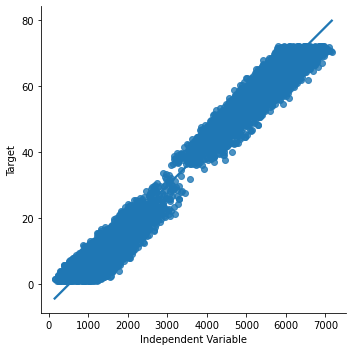

In [16]:
df[['Bandwidth_GB_Year', 'Tenure']]
sns.lmplot(x="Bandwidth_GB_Year", y="Tenure", data=df, order=1)
plt.ylabel('Target')
plt.xlabel('Independent Variable')

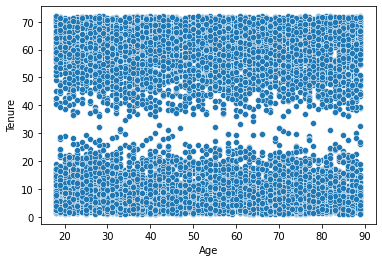

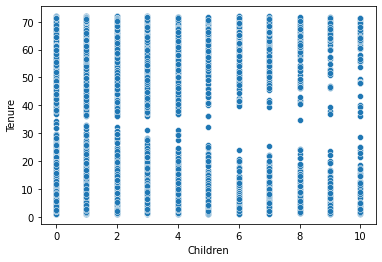

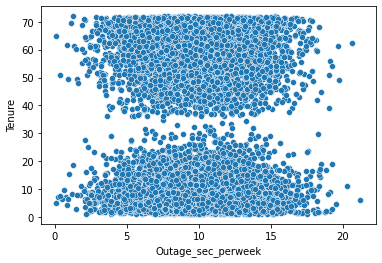

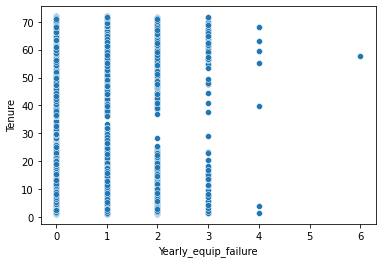

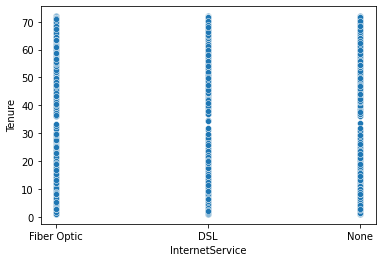

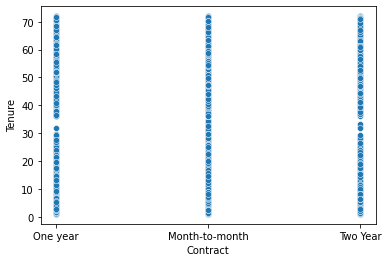

In [17]:
#Check other variables to see Linearity
#But will not use the ones that still contain outliers
sns.scatterplot(x=df['Age'], y=df['Tenure'])
plt.show()
sns.scatterplot(x=df['Children'], y=df['Tenure'])
plt.show()
sns.scatterplot(x=df['Outage_sec_perweek'], y=df['Tenure'])
plt.show()
sns.scatterplot(x=df['Yearly_equip_failure'], y=df['Tenure'])
plt.show()
sns.scatterplot(x=df['InternetService'], y=df['Tenure'])
plt.show()
sns.scatterplot(x=df['Contract'], y=df['Tenure'])
plt.show()

In [18]:
#Replace Churn with 0 and 1
#df.Churn.replace({"Yes":1, "No":0}, inplace=True)


In [19]:
#Create dummy variables for statistic models
df_dc = pd.get_dummies(df, drop_first=True)

In [20]:
df_dc.columns


Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability',
       'Options', 'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male', 'Gender_Nonbinary',
       'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')

In [21]:
df_dc.to_csv('prepared_dataset.csv')

In [22]:
df_dc = df_dc.drop(columns=['Gender_Nonbinary'])

In [23]:
28# StatsModels.Regression.Linear_Model.OLS
# Constant is the expected mean value of Y when all X=0
df_dc['Intercept'] = 1  
linear_reg = sm.OLS(df_dc['Tenure'], df_dc[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability',
       'Options', 'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male', 
       'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check','Intercept']]).fit()
print(linear_reg.summary())




                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.408e+07
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:26:47   Log-Likelihood:                 7519.4
No. Observations:               10000   AIC:                        -1.496e+04
Df Residuals:                    9961   BIC:                        -1.468e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [24]:
# Only with no dummy variables initial model 
df_dc['Intercept'] = 1  
linear_reg = sm.OLS(df_dc['Tenure'], df_dc[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email','Bandwidth_GB_Year',
                                                'Contacts', 'Yearly_equip_failure', 'MonthlyCharge',
                                                'Timely response', 'Timely fixes',
                                                'Timely replacements', 'Reliability', 'Options', 'Respectful response',
                                                'Courteous exchange', 'Evidence of active listening', 'Intercept']]).fit()
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.306e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:26:47   Log-Likelihood:                -24365.
No. Observations:               10000   AIC:                         4.877e+04
Df Residuals:                    9982   BIC:                         4.890e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Children        

In [25]:
#heat Graph variables
bivariate_graph = df_dc[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability',
       'Options', 'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male', 
       'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check','Tenure']]

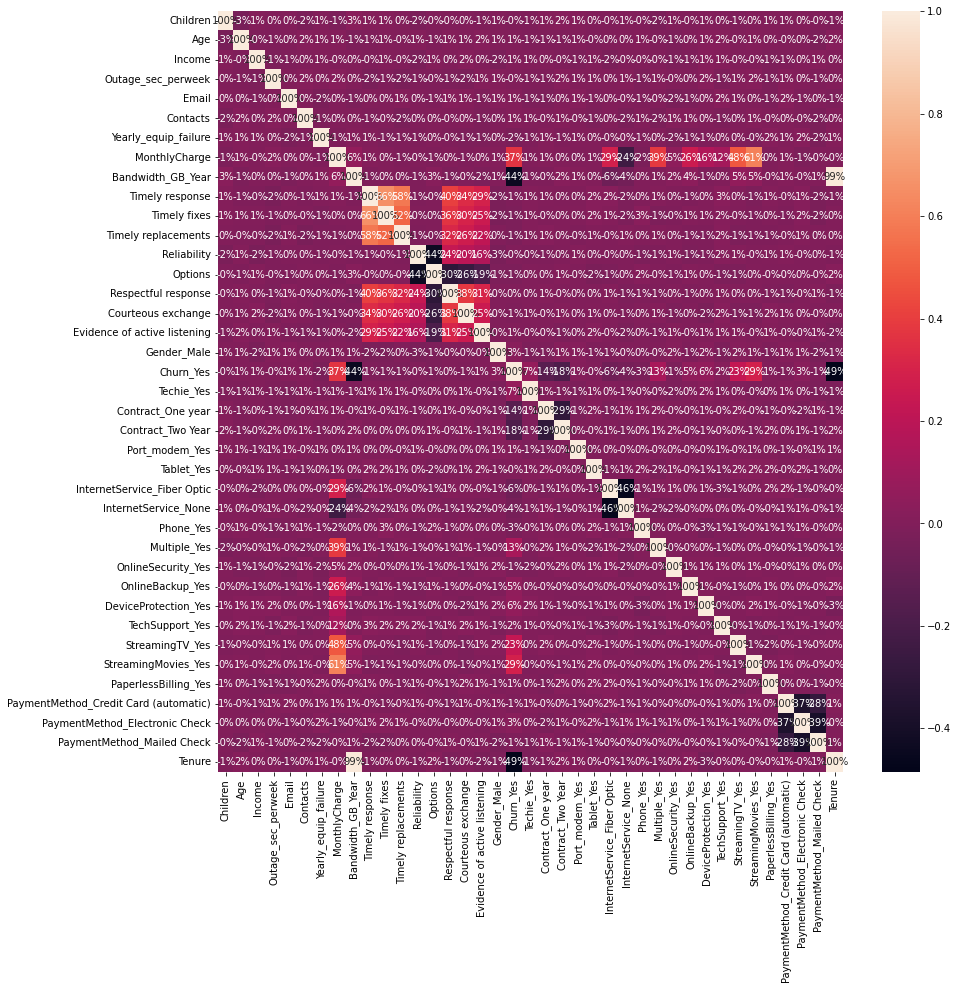

In [26]:
# Heat map to visualize the correlation
plt.figure(figsize=(14.0,14.0))
sns.heatmap(bivariate_graph.corr(), annot=True,fmt='.0%')


In [27]:
# Check for feature selection with a threshold of .5%
cor = df_dc.corr()
threshold = 0.5
a = abs(cor['Tenure'])
result=a[a>threshold]
result

Tenure               1.000000
Bandwidth_GB_Year    0.991495
Name: Tenure, dtype: float64

In [28]:
# Above code gives us only one feature back which is bandwidth_Gb_Year
# But need more then this so lets try step forward selection
X=df_dc.drop('Tenure',axis=1)
y=df_dc['Tenure']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

LR = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.3, random_state = 0)
sfs1 = sfs(LR, n_features_to_select = 5, direction='forward', scoring='r2', cv=5)
sfs1 = sfs1.fit(X_train, y_train)

In [29]:
feat_cols = list(sfs1.get_support())
print(feat_cols)

[False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [30]:
X.columns
#Age MonthlyCharge Bandwidth_GB_Year InternetService_Fiber Optic 'InternetService_None'

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability',
       'Options', 'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male', 'Churn_Yes',
       'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Intercept'],
      dtype='object')

In [31]:
# Reduce number of variables for a better outlook
# Create heat map to visualize this
bivariate_graph_2 = df_dc[['Bandwidth_GB_Year','Age','InternetService_Fiber Optic', 
                           'MonthlyCharge', 'InternetService_None', 'Tenure' ,]]


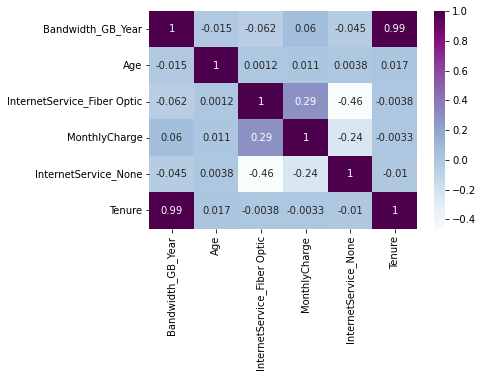

In [32]:
sns.heatmap(bivariate_graph_2.corr(), annot=True, cmap="BuPu")
plt.show()

In [33]:
# Check if reduction of variables will have close to same effect.
df_dc['Intercept'] = 1  
reduced_reg = sm.OLS(df_dc['Tenure'], df_dc[['Bandwidth_GB_Year','Age','InternetService_Fiber Optic', 'MonthlyCharge', 'InternetService_None' , 'Intercept']]).fit()

print(reduced_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.006e+06
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:26:57   Log-Likelihood:                -15825.
No. Observations:               10000   AIC:                         3.166e+04
Df Residuals:                    9994   BIC:                         3.170e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Bandwidth_GB_Year 

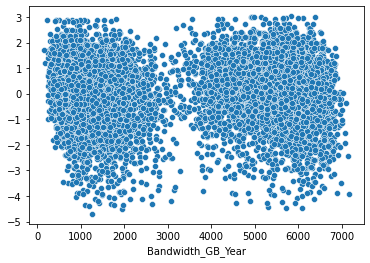

In [35]:
#Residual plot of reduced multiple regression variables

df_dc['intercept'] =1
residual_plt = df_dc['Tenure'] - reduced_reg.predict(df_dc[[
                                                            'Bandwidth_GB_Year','Age','InternetService_Fiber Optic', 'MonthlyCharge', 'InternetService_None',
                                                            'Intercept']])

sns.scatterplot(x=df_dc['Bandwidth_GB_Year'], y= residual_plt)
plt.show()